Up file iris

In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


Thêm các thư viện cần thiết

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [4]:
df = pd.read_csv("iris.csv", index_col=0)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


KIỂM TRA DỮ LIỆU

1.Thông tin tổng quan

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


2.Kiểm tra missing value

In [6]:
df.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


3. Kiểm tra trùng lặp

In [8]:
df.duplicated().sum()

df[df.duplicated(keep=False)]


,sepal_length,sepal_width,petal_length,petal_width,species
102,5.8,2.7,5.1,1.9,virginica
143,5.8,2.7,5.1,1.9,virginica


4. Thông kê mô tả

In [ ]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


EDA – Phân tích khám phá dữ liệu

1.Phân bố số lượng từng loài hoa


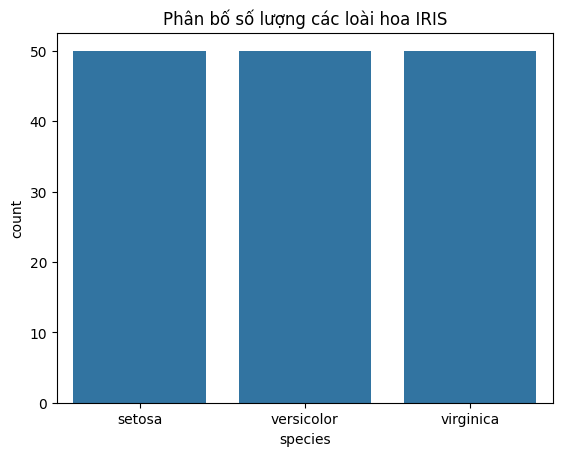

In [9]:
df['species'].value_counts()
sns.countplot(x='species', data=df)
plt.title("Phân bố số lượng các loài hoa IRIS")
plt.show()




2. Kiểm tra phân phối của từng đặc trưng

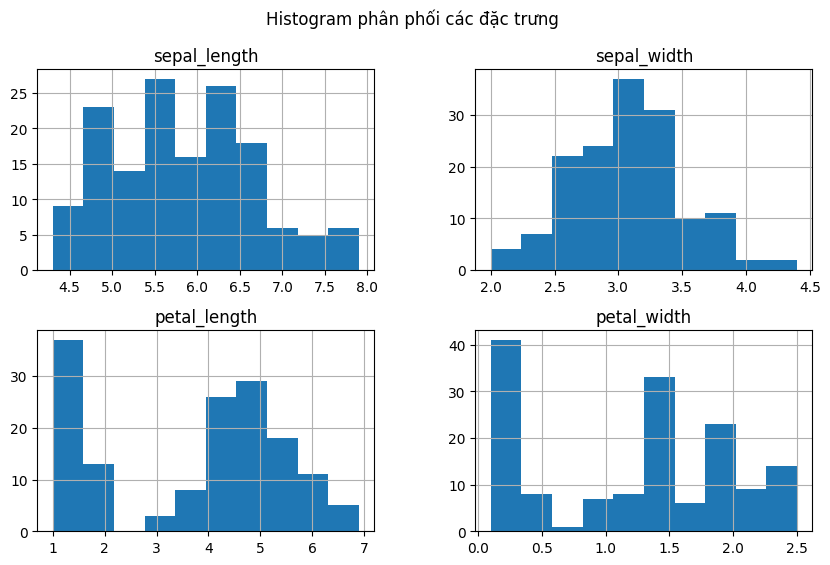

In [10]:
df.hist(figsize=(10,6))
plt.suptitle("Histogram phân phối các đặc trưng")
plt.show()


Pairplot (Deliverable 01)

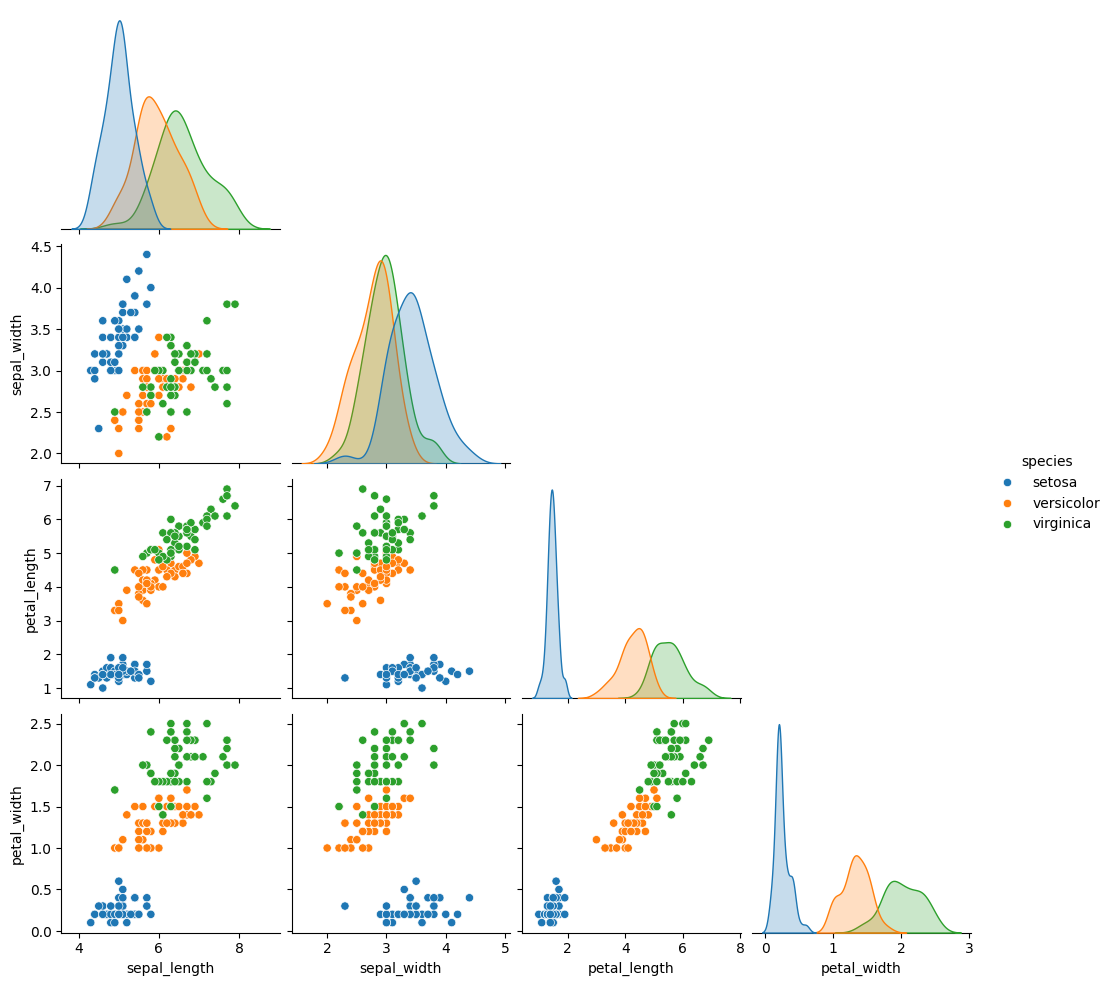

In [13]:
sns.pairplot(
    df,
    hue="species",
    diag_kind="kde",
    corner=True
)
plt.savefig("pairplot_iris.png", dpi=300)
plt.show()


3. Phát hiện giá trị bất thường (Outliers)

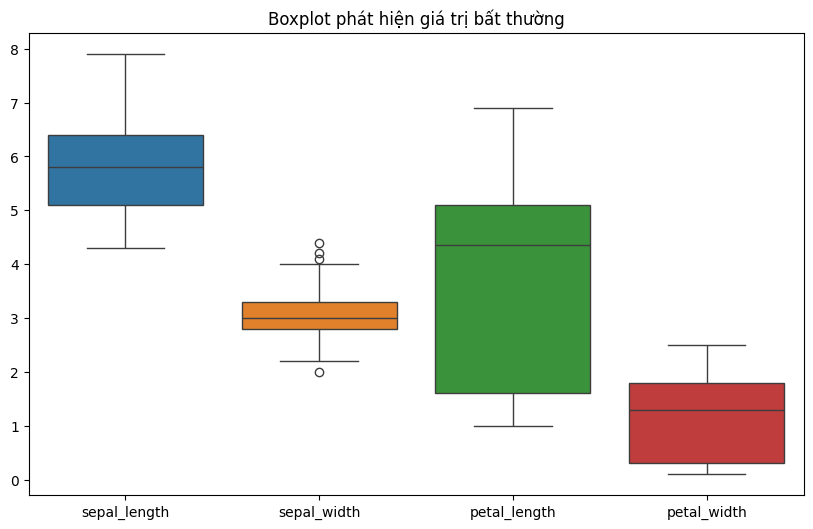

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns="species"))
plt.title("Boxplot phát hiện giá trị bất thường")
plt.show()


Heatmap tương quan (Deliverable 02)

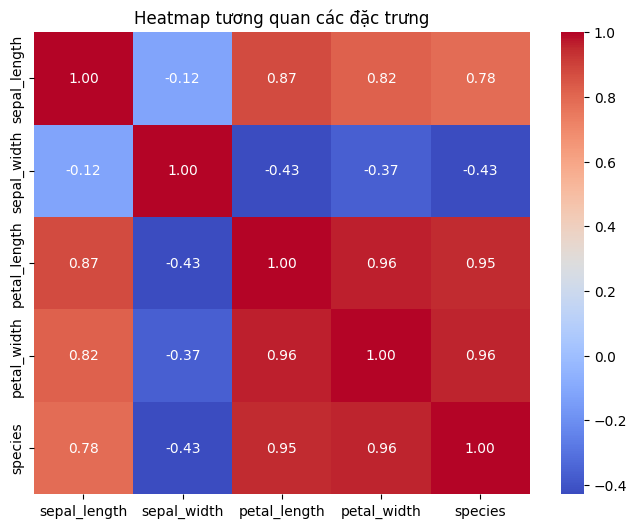

In [15]:
df_corr = df.copy()
df_corr['species'] = df_corr['species'].map({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})
plt.figure(figsize=(8,6))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Heatmap tương quan các đặc trưng")
plt.savefig("heatmap_iris.png", dpi=300)
plt.show()


Chuẩn bị dữ liệu Train / Test

Tách X và y

In [16]:
X = df.drop(columns=['species'])
y = df['species']

Mã hóa nhãn (Label Encoding)

In [17]:
class_map = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}

y_encoded = y.map(class_map)


Chuẩn hóa dữ liệu (Standard Scaling )

In [18]:
def standard_scaler(X):
    return (X - X.mean()) / X.std()

X_scaled = standard_scaler(X)
print("Shape:", X_scaled.shape)
print("\nMean:\n", X_scaled.mean())
print("\nStd:\n", X_scaled.std())
print("\nSample:\n", X_scaled.head())


Shape: (150, 4)

Mean:
 sepal_length   -5.210647e-16
sepal_width    -7.579123e-16
petal_length   -2.842171e-16
petal_width    -3.789561e-16
dtype: float64

Std:
 sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64

Sample:
    sepal_length  sepal_width  petal_length  petal_width
1     -0.897674     1.015602     -1.335752    -1.311052
2     -1.139200    -0.131539     -1.335752    -1.311052
3     -1.380727     0.327318     -1.392399    -1.311052
4     -1.501490     0.097889     -1.279104    -1.311052
5     -1.018437     1.245030     -1.335752    -1.311052


Train / Test Split 80/20

In [19]:
np.random.seed(42)

indices = np.arange(len(X_scaled))
np.random.shuffle(indices)

split = int(0.8 * len(indices))

train_idx = indices[:split]
test_idx  = indices[split:]

X_train = X_scaled.iloc[train_idx]
X_test  = X_scaled.iloc[test_idx]
y_train = y_encoded.iloc[train_idx]
y_test  = y_encoded.iloc[test_idx]
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


Xuất CSV

In [ ]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False, header=True)
y_test.to_csv("y_test.csv", index=False, header=True)
